# Feature Engineering Customer behaviour 

In [184]:
#Decision Tree, cross validation and ensemble models
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib notebook
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
from random import randint
import sklearn
print (sklearn.__version__) #0.19.1

0.19.1


In [185]:
os.getcwd()

data_directory = os.path.join(
    '/Users/niloofarzarifi/Desktop/Udacity/khaneh/Watson-IBM-customer/MTC-PYTHON-PROJECT')
data = pd.read_csv(os.path.join(data_directory, "Marketing-Customer.csv"))

we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the **label encoding** scheme.

In [150]:
list(data.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O')]

## Correlation of numerical columns

<IPython.core.display.Javascript object>


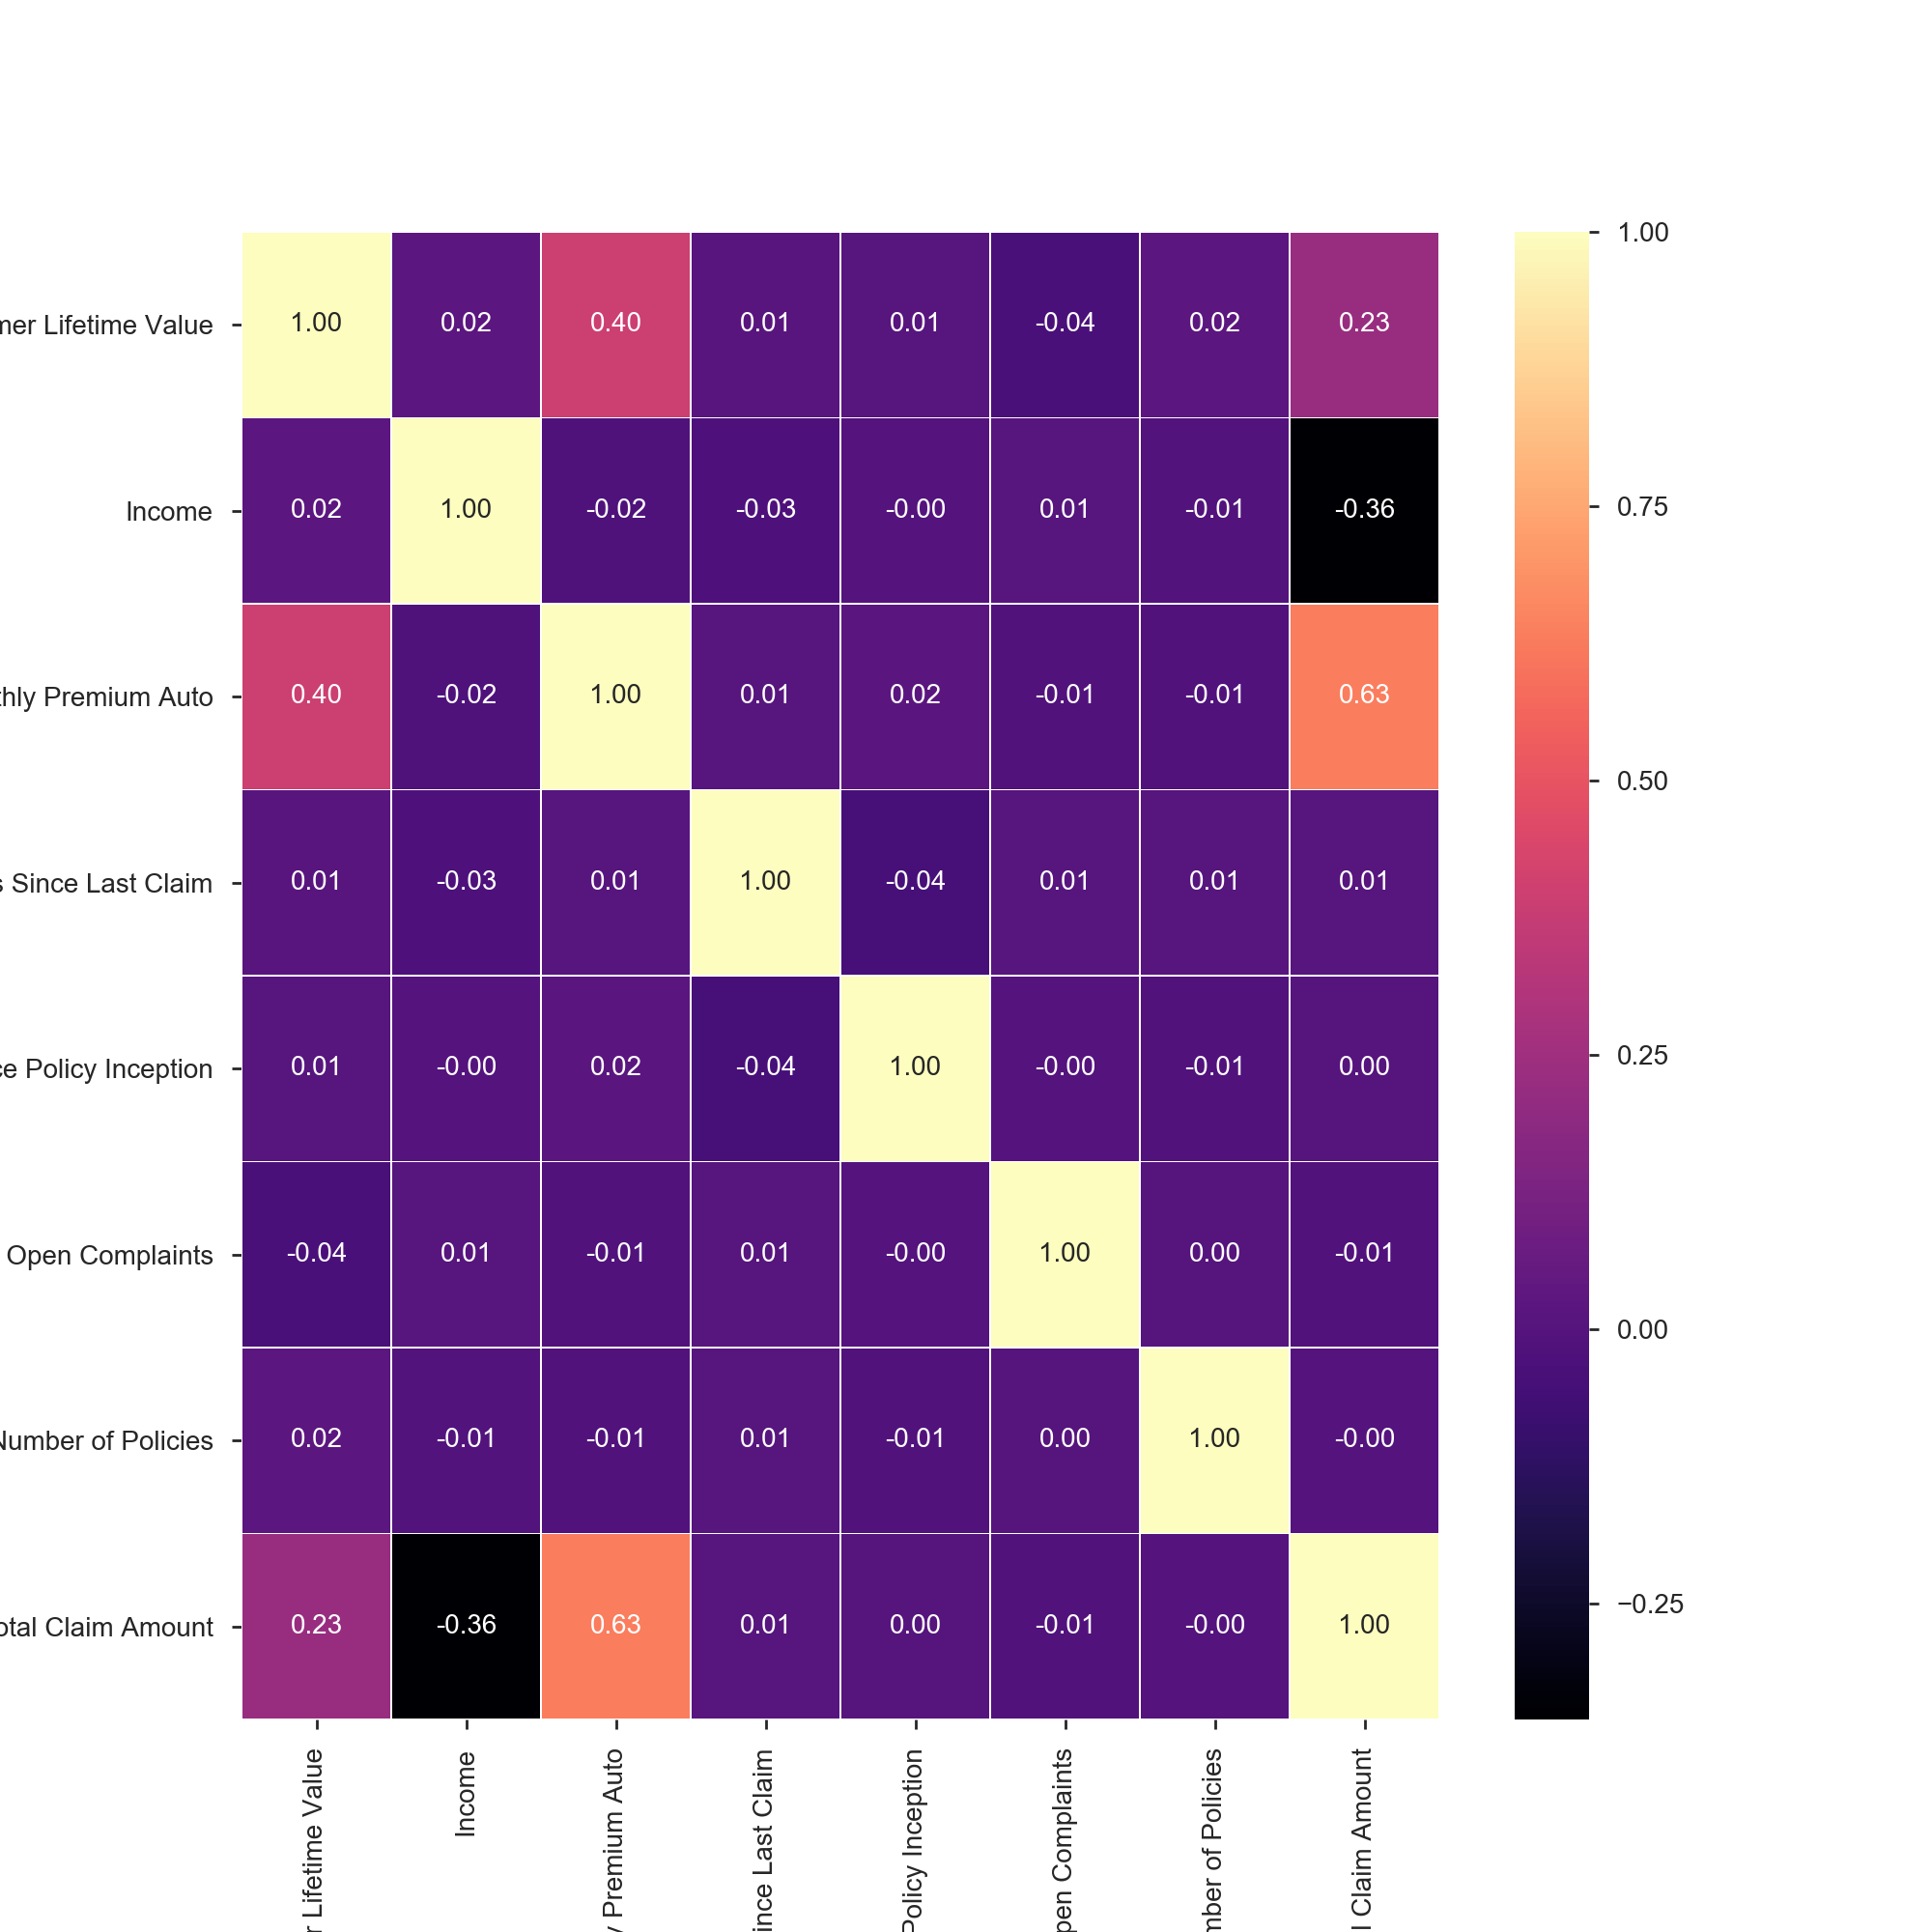

In [151]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

## pandas_profiling
Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

<IPython.core.display.Javascript object>


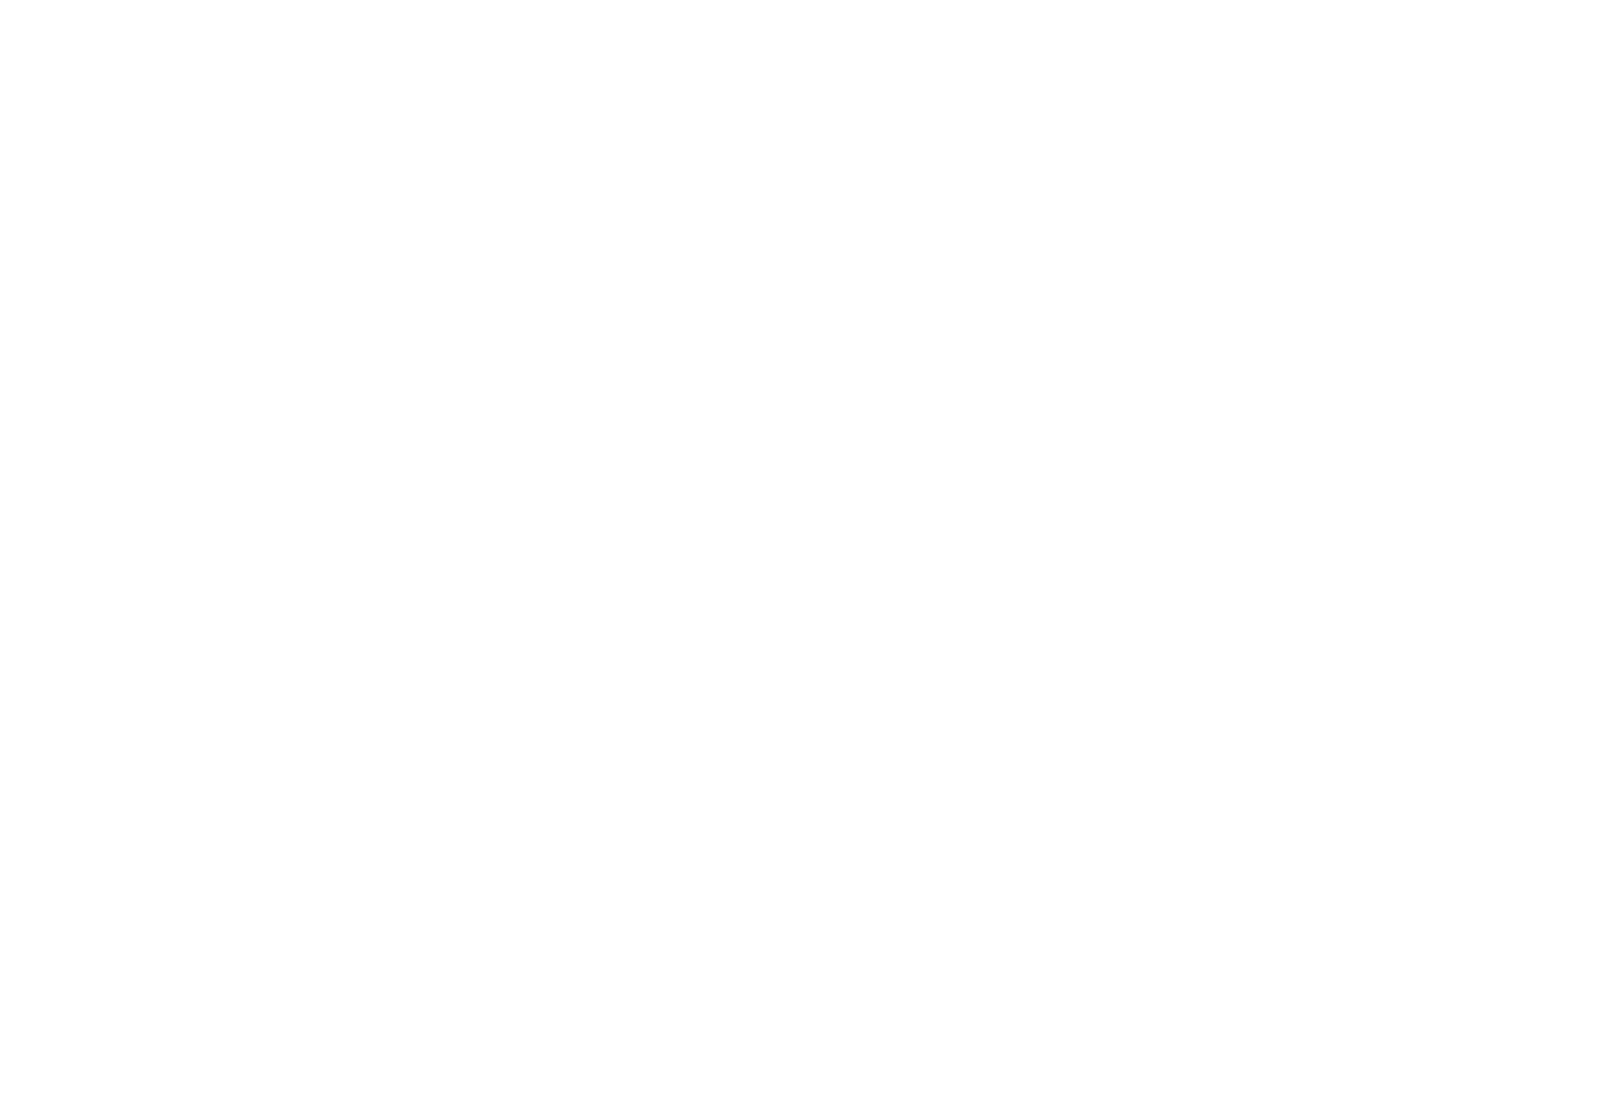

<IPython.core.display.Javascript object>


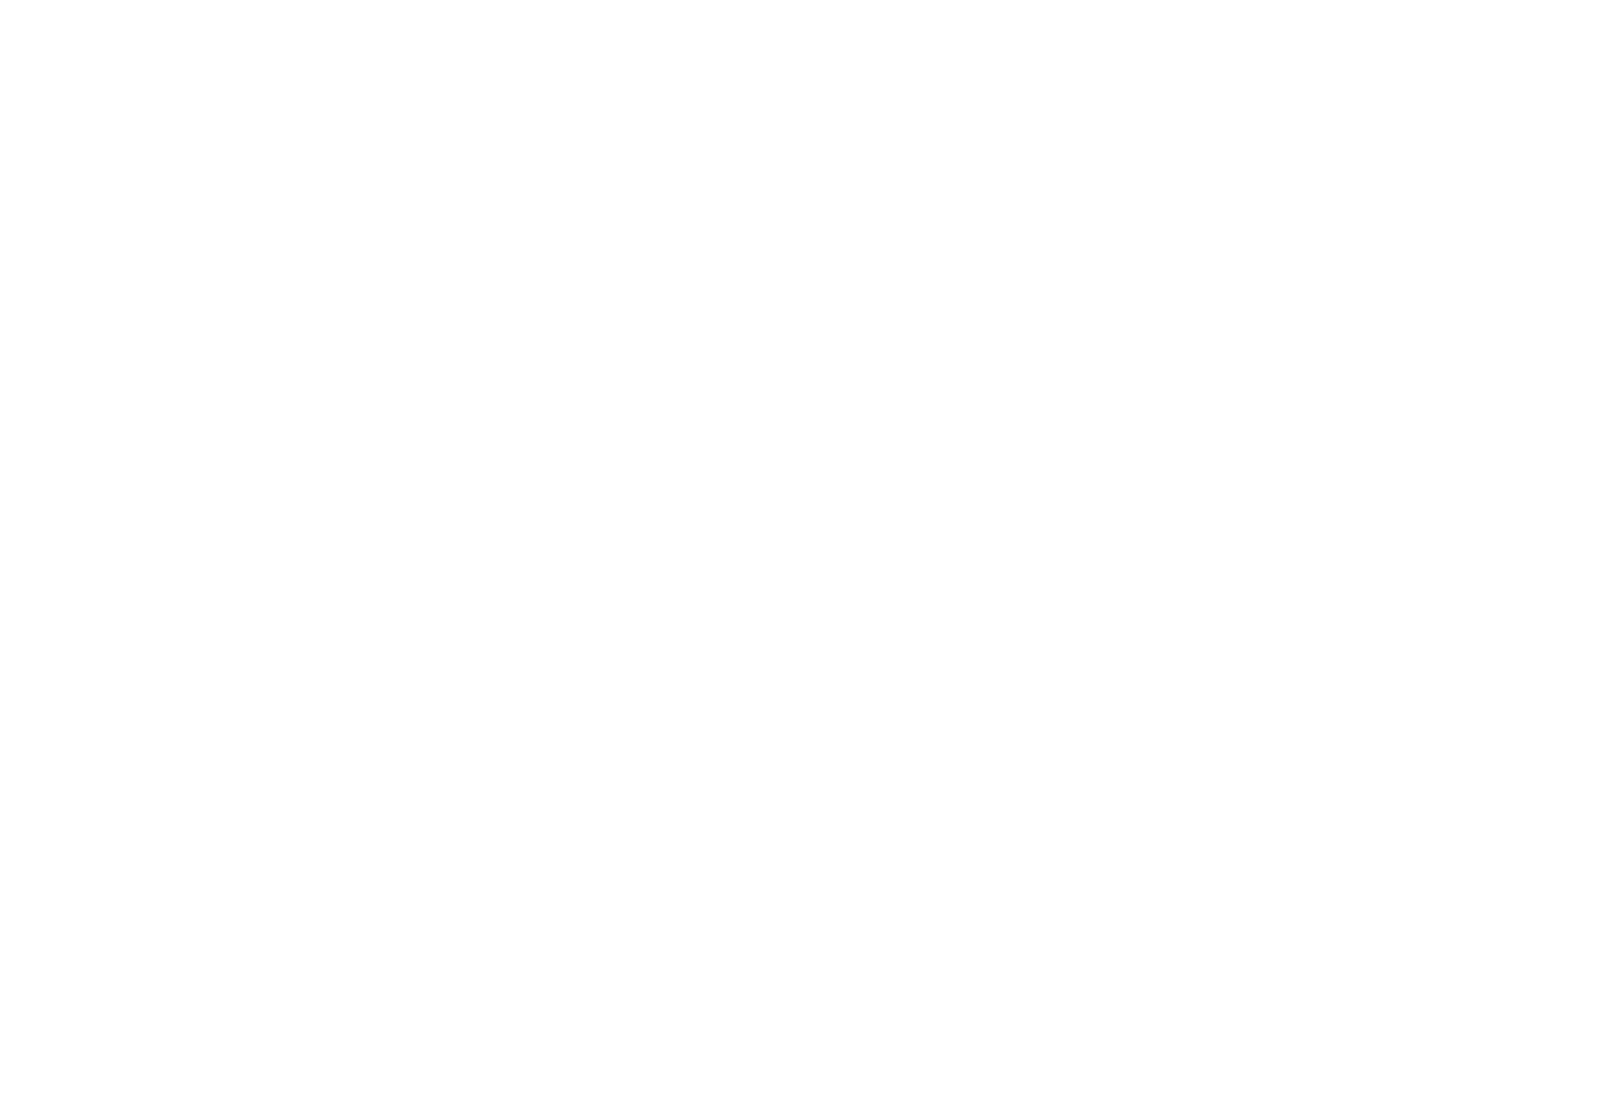

Number of variables,24
Number of observations,9134
Total Missing (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,192.0 B
Numeric,8
Categorical,15
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [131]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

The dataset only shows months 1,2 in 2011. Therfore, we do not have full season
information and we can drop year column

# Label Encoding
<br>

### Column: Effective To Date

In [132]:
import datetime

def splitTime(df_name,column_name):
    df_name['year'] = pd.DatetimeIndex(df_name[column_name]).year
    df_name['month'] = pd.DatetimeIndex(df_name[column_name]).month
    df_name['day'] = pd.DatetimeIndex(df_name[column_name]).day

splitTime(data,'Effective To Date')

print (data.year.value_counts())
# drop original collumn and year column
data.drop(columns =["Effective To Date","year"], inplace = True)
print (data.month.value_counts())


2011    9134
Name: year, dtype: int64
1    4898
2    4236
Name: month, dtype: int64


### Columns: Coverage, Education, EmploymentStatus, State, Vehicle Class, Sales Channel


In [133]:
def coverage(x):
    if x =='Basic':
        return 0
    elif x == 'Extended':
        return 1
    else:
        return 2        
data['Coverage']=data['Coverage'].apply(coverage) 

#data.Education.unique()
def education(x):
    if x =='High School or Below':
        return 0
    elif x == 'College':
        return 1
    elif x=='Bachelor':
        return 2
    elif x=='Master':
        return 3
    else:
        return 4    
data['Education']=data['Education'].apply(education)

#data['EmploymentStatus'].unique()
def employmentstatus(x):
    if x =='Employed':
        return 0
    elif x == 'Unemployed':
        return 1
    elif x=='Medical Leave':
        return 2
    elif x=='Disabled':
        return 3
    else:
        return 4    
data['EmploymentStatus']=data['EmploymentStatus'].apply(employmentstatus)

#data['State'].unique()
def state(x):
    if x =='California':
        return 0
    elif x == 'Washington':
        return 1
    elif x=='Arizona':
        return 2
    elif x=='Nevada':
        return 3
    else:
        return 4    
data['State']=data['State'].apply(state)

#data['Vehicle Class'].unique()
def vehicleclass(x):
    if x =='Two-Door Car':
        return 0
    elif x == 'Four-Door Car':
        return 1
    elif x=='Sports Car':
        return 2
    elif x=='SUV':
        return 3
    elif x=='Luxury SUV':
        return 4
    else:
        return 5    
data['Vehicle Class']=data['Vehicle Class'].apply(vehicleclass)

#data['Sales Channel'].unique()
def saleschannel(x):
    if x =='Agent':
        return 0
    elif x == 'Branch':
        return 1
    elif x=='Call Center':
        return 2
    else:
        return 3    
data['Sales Channel']=data['Sales Channel'].apply(saleschannel)    

### Columns: Gender, Location Code, Martial Status, Vehicle Size, Policy Type

In [134]:
data['Gender'] = data["Gender"].apply(lambda x : 0 if x=='F' else 1)
data['Location Code']=data['Location Code'].apply(
                       lambda x: 0 if x=='Suburban' else(1 if x=='Rural' else 2))
data['Marital Status']=data['Marital Status'].apply(
                       lambda x: 0 if x=='Married' else(1 if x=='Single' else 2))
data['Vehicle Size']=data['Vehicle Size'].apply(
                       lambda x: 0 if x=='Small' else(1 if x=='Medsize' else 2))
data['Policy Type']=data['Policy Type'].apply(
                       lambda x: 0 if x=='Corporate Auto' else(1 if x=='Personal Auto' else 2))

### Columns: Policy
<br>
We split Policy column to Policy_Name and Policy_Code

In [135]:
#https://www.ritchieng.com/pandas-apply/
#df['Price'] = df.apply(lambda x: int(x['Price'].replace(',', '')),axis=1)
print (data['Policy'].unique())

# new data frame with split value columns 
new = data["Policy"].str.split(" ", n = 1, expand = True) 
  
# making separate columns from new data frame 
new[0]=new[0].apply(lambda x: 0 if x=='Corporate' else (1 if x=='Personal' else 2)) 
data["Policy_Name"]= new[0]

# making separate last column from new data frame 
new[1]=new[1].apply(lambda x: 1 if x=='L1' else(2 if x=='L2' else 3))
data["Policy_Code"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["Policy"], inplace = True) 

['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']


### Column: Renew Offer Type
<br>
We convert or slice Offer1, Offer2,... to 1,2,....

In [136]:
"""
TypeError: string indices must be integers, not tuple
data['Renew Offer Type']=data['Renew Offer Type'].apply(lambda x: x[2,3])
"""
data['Renew Offer Type'].unique()
data['Renew Offer Type']=data['Renew Offer Type'].str[5:6]


In [137]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month,day,Policy_Name,Policy_Code
0,BU79786,1,2763.519279,No,0,2,0,0,56274,0,...,0,1,0,384.811147,0,1,2,24,0,3
1,QZ44356,2,6979.535903,No,1,2,1,0,0,0,...,1,3,0,1131.464935,1,1,1,31,1,3
2,AI49188,3,12887.431650,No,2,2,0,0,48767,0,...,1,1,0,566.472247,0,1,2,19,1,3
3,WW63253,0,7645.861827,No,0,2,1,1,0,0,...,0,1,2,529.881344,3,1,1,20,0,2
4,HB64268,1,2813.692575,No,0,2,0,1,43836,1,...,1,1,0,138.130879,1,1,2,3,1,1


###  Create new csv file: label_encoding.csv

In [138]:
data.to_csv("label_encoding.csv",index=False)

## Target-based encoding
<br>

### replace categorical features with corresponding mean value


In [260]:
os.getcwd()

data_directory = os.path.join(
    '/Users/niloofarzarifi/Desktop/Udacity/khaneh/Watson-IBM-customer/MTC-PYTHON-PROJECT')
data2 = pd.read_csv(os.path.join(data_directory, "Marketing-Customer.csv"))

data2 excludes Customer and Effective date from dataset

In [261]:
# 8 columns are numerical
non_categorical_columns=[x for x in data2.dtypes.index if data2.dtypes[x] in ['float64', 'int64']]

# 16 columns are categorical, remove Customer and Effective date and separate Target:Response   
categorical_columns=[x for x in data2.dtypes.index if data2.dtypes[x]=='object'] 
categorical_columns=[x for x in categorical_columns if x not in ['Customer','Response','Effective To Date']]

# Convert Target to binary values
data2['Response']=data2['Response'].apply(lambda x: 0 if x=='No' else 1)


## target_encoder

This function could convert categorical features to mean, median and std relative to Target values

In [262]:
def target_encoder(df, column, target, index=None, method='mean'):
    """
    Target-based encoding is numerization of a categorical variables via the target variable. Main purpose is to deal
    with high cardinality categorical features without exploding dimensionality. This replaces the categorical variable
    with just one new numerical variable. Each category or level of the categorical variable is represented by a
    summary statistic of the target for that level.
    Args:
        df (pandas df): Pandas DataFrame containing the categorical column and target.
        column (str): Categorical variable column to be encoded.
        target (str): Target on which to encode.
        index (arr): Can be supplied to use targets only from the train index. Avoids data leakage from the test fold
        method (str): Summary statistic of the target. Mean, median or std. deviation.
    Returns:
        arr: Encoded categorical column.
    """

    index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

    if method == 'mean':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
    elif method == 'median':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
    elif method == 'std':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
    else:
        raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

    return encoded_column

In [263]:
#Apply function target_encoder to each categorical_columns
dfs=[]
for i in range(len(categorical_columns)):          
       series=target_encoder(data2, column=categorical_columns[i],
                             target='Response', index=None, method='mean')
       dfs.append(series)   
big_frame=pd.concat(dfs,axis=1,ignore_index=True)
big_frame.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.14,0.14,0.14,0.13,0.14,0.17,0.13,0.15,0.15,0.16,0.19,0.14,0.15
1,0.14,0.14,0.14,0.09,0.14,0.17,0.12,0.14,0.14,0.02,0.19,0.14,0.15
2,0.14,0.15,0.14,0.13,0.14,0.17,0.13,0.14,0.14,0.16,0.19,0.14,0.15


### Rename headers

In [264]:
big_frame.columns=categorical_columns
big_frame.head(3)

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,0.14,0.14,0.14,0.13,0.14,0.17,0.13,0.15,0.15,0.16,0.19,0.14,0.15
1,0.14,0.14,0.14,0.09,0.14,0.17,0.12,0.14,0.14,0.02,0.19,0.14,0.15
2,0.14,0.15,0.14,0.13,0.14,0.17,0.13,0.14,0.14,0.16,0.19,0.14,0.15


To create **final dataset (new_data2)** we need to concat (Target + categorical_columns + non_categorical_columns) and rename header to original format

In [265]:
dfs=[data2['Response'], big_frame, data2[non_categorical_columns]]
new_data2=pd.concat(dfs,axis=1,ignore_index=True)

# Crate the list of new header
new_headers=['Response']
new_headers.extend(categorical_columns)
new_headers.extend(non_categorical_columns)
# replace new_header 
new_data2.columns=new_headers

In [268]:
new_data2.head()
print (new_data2.shape)

(9134, 22)


###  Create new csv file: mean_label_encoding.csv

In [269]:
new_data2.to_csv("mean_label_encoding.csv",index=False)

## category_encoders

A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques. While ordinal, one-hot, and hashing encoders have similar equivalents in the existing scikit-learn version, the transformers in this library all share a few useful properties

List of encoders:

encoder = ce.BackwardDifferenceEncoder(cols=[...])
<br>
encoder = ce.BaseNEncoder(cols=[...])
<br>
encoder = ce.BinaryEncoder(cols=[...])
<br>
encoder = ce.CatBoostEncoder(cols=[...])
<br>
encoder = ce.HashingEncoder(cols=[...])
<br>
encoder = ce.HelmertEncoder(cols=[...])
<br>
encoder = ce.JamesSteinEncoder(cols=[...])
<br>
encoder = ce.LeaveOneOutEncoder(cols=[...])
<br>
encoder = ce.MEstimateEncoder(cols=[...])
<br>
encoder = ce.OneHotEncoder(cols=[...])
<br>
encoder = ce.OrdinalEncoder(cols=[...])
<br>
encoder = ce.SumEncoder(cols=[...])
<br>
encoder = ce.PolynomialEncoder(cols=[...])
<br>
encoder = ce.TargetEncoder(cols=[...])
<br>
encoder = ce.WOEEncoder(cols=[...])

encoder.fit(X, y)
<br>
X_cleaned = encoder.transform(X_dirty)

**Original and tutorial websites:**
<br>
https://contrib.scikit-learn.org/categorical-encoding/
<br>
https://www.kaggle.com/discdiver/category-encoders-examples

In [275]:
os.getcwd()

data_directory = os.path.join(
    '/Users/niloofarzarifi/Desktop/Udacity/khaneh/Watson-IBM-customer/MTC-PYTHON-PROJECT')
data3 = pd.read_csv(os.path.join(data_directory, "Marketing-Customer.csv"))

# 8 columns are numerical
non_categorical_columns=[x for x in data3.dtypes.index if data3.dtypes[x] in ['float64', 'int64']]

# 16 columns are categorical, remove Customer and Effective date and separate Target:Response   
categorical_columns=[x for x in data3.dtypes.index if data3.dtypes[x]=='object'] 
categorical_columns=[x for x in categorical_columns if x not in ['Customer','Response','Effective To Date']]

# Convert Target to binary values
data3['Response']=data3['Response'].apply(lambda x: 0 if x=='No' else 1)


In [278]:
# Target with default parameters
dfs2=[]
for i in range(len(categorical_columns)):
    ce_target = ce.woe.WOEEncoder(cols = categorical_columns[i])
    ce_target.fit(data3[categorical_columns[i]],data3['Response'])
    series2=ce_target.transform(data3[categorical_columns[i]], data3['Response'])
    dfs2.append(series2)  
    
big_frame2=pd.concat(dfs2,axis=1,ignore_index=True)
big_frame2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.05,0.00,-0.05,-0.09,-0.01,0.23,-0.10,0.03,0.06,0.12,0.35,-0.02,0.03
1,-0.00,-0.01,-0.05,-0.58,-0.01,0.23,-0.23,-0.02,-0.05,-2.02,0.35,-0.07,0.03
2,-0.02,0.03,-0.05,-0.09,-0.01,0.23,-0.10,-0.02,-0.05,0.12,0.35,-0.02,0.03


In [281]:
dfs2=[data3['Response'], big_frame2, data3[non_categorical_columns]]
new_data3=pd.concat(dfs2,axis=1,ignore_index=True)

# Crate the list of new header
new_headers=['Response']
new_headers.extend(categorical_columns)
new_headers.extend(non_categorical_columns)
# replace new_header 
new_data3.columns=new_headers

In [282]:
new_data3.head()

,Response,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,-0.05,0.00,-0.05,-0.09,-0.01,0.23,-0.10,0.03,0.06,...,-0.02,0.03,2763.52,56274,69,32,5,0,1,384.81
1,0,-0.00,-0.01,-0.05,-0.58,-0.01,0.23,-0.23,-0.02,-0.05,...,-0.07,0.03,6979.54,0,94,13,42,0,8,1131.46
2,0,-0.02,0.03,-0.05,-0.09,-0.01,0.23,-0.10,-0.02,-0.05,...,-0.02,0.03,12887.43,48767,108,18,38,0,2,566.47
3,0,0.01,0.00,-0.05,-0.58,0.01,0.23,-0.10,0.03,0.05,...,0.13,0.03,7645.86,0,106,18,65,0,7,529.88
4,0,-0.05,0.00,-0.05,-0.09,0.01,-0.50,-0.23,-0.02,0.05,...,-0.07,0.03,2813.69,43836,73,12,44,0,1,138.13


In [283]:
new_data3.to_csv("WeightofEvidence_encoding.csv",index=False)